In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import sys 
sys.path.append('../lavse/')
import json 
import numpy as np

In [2]:
def load_json(path):
    with open(path, 'rb') as ftp:
        return json.load(ftp)

In [3]:
def get_xy(data):
    x, y = [], []
    for line in data:
        x.append(line[1])
        y.append(line[2])
    x = np.array(x)
    y = np.array(y)
    return x, y

In [25]:
settings = {
    'eta_0': {        
        'color': '#db4437',
        'label': '$\eta=0$',
        'marker': '+',
        't2i': 'grad/run-adaptive_i2t_bn_linear_f30k_precomp.en-tag-grads_img_enc.projection.0.weight.json',
    },
    'eta_0.9': {        
        'color': '#f4b400',
        'label': '$\eta=0.9$',
        'marker': 'x',
        't2i': 'ablation/run-beta_0.9_f30k_precomp.en-tag-f30k_precomp.dev.en_t2i_r1.json',
    },
    'eta_0.99': {        
        'color': '#00786a',
        'label': '$\eta=0.99$',
        'marker': '',
        't2i': 'ablation/run-beta_0.99_f30k_precomp.en-tag-f30k_precomp.dev.en_t2i_r1.json',
    },
    'eta_0.999': {        
        'color': '#4184f3',
        'label': '$\eta=0.999$',
        'marker': '*',
        't2i': 'ablation/run-beta_0.999_f30k_precomp.en-tag-f30k_precomp.dev.en_t2i_r1.json',
    },
    'eta_0.9999': {        
        'color': '#5b6abf',
        'label': '$\eta=0.9999$',
        'marker': '.',
        't2i': 'ablation/run-beta_0.9999_f30k_precomp.en-tag-f30k_precomp.dev.en_t2i_r1.json',
    },
}

In [26]:
plot_list = [
    'eta_0', 'eta_0.9', 'eta_0.99', 'eta_0.999', 'eta_0.9999', 
]

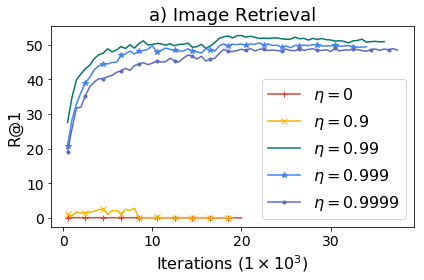

In [27]:
metric = 't2i'
title = 'a) Image Retrieval'

fig, ax = plt.subplots()
for method in plot_list:    
    config = settings[method]
    file = load_json(config[metric])
    x, y = get_xy(file)
    
    _ = ax.plot(
        x/1000, y, 
        color=config['color'], 
        marker=config['marker'],
        label=config['label'],
        markevery=4,
    )
ax.tick_params(labelsize=14)
plt.legend(fontsize=16)
plt.xlabel('Iterations ($1\\times10^3$)', fontsize=16)
plt.ylabel('R@1', fontsize=16)
plt.title(title, fontsize=18)
plt.tight_layout()
plt.savefig(f'ablation_{metric}.pdf', bbox_to_inches='tight')

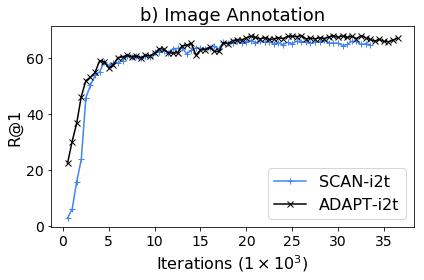

In [39]:
metric = 'i2t'
title = 'b) Image Annotation'

fig, ax = plt.subplots()
for method in plot_list:    
    config = settings[method]
    file = load_json(config[metric])
    x, y = get_xy(file)
    _ = ax.plot(
        x/1000, y, 
        color=config['color'], 
        marker=config['marker'],
        label=config['label'],
    )
ax.tick_params(labelsize=14)
plt.legend(fontsize=16)
plt.xlabel('Iterations ($1\\times10^3$)', fontsize=16)
plt.ylabel('R@1', fontsize=16)
plt.title(title, fontsize=18)
plt.tight_layout()
plt.savefig(f'{metric}.pdf', bbox_to_inches='tight')